<a href="https://colab.research.google.com/github/svondracek0/Data-Science-Practicum/blob/main/NLP%20DS%20Praktikum%20HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Generátor textu na základě Trumpových projevů  

*Štěpán Vondráček, 466498*

Na souboru https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt natrénuji transformer, který následně vygeneruje náhodný Trumpův projev. Můj projekt je do značné míry založen na projektu zabývajícím se projevy A. Babiše

## Načtení knihoven a dat

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import re

from google.colab import drive

In [4]:
drive.mount('/content/drive') # pripojeni vlastniho Google drive, na kterem mam ulozeny .txt soubor s Trumpovymi projevy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path1 = '/content/drive/MyDrive/trump_speech.txt'
path2 = '/content/drive/MyDrive/trump_speech.txt'


In [7]:
# read input data
file = open(path1, "r")
data = file.read()
file.close()
print(data[:50])

﻿SPEECH 1


...Thank you so much.  That's so nice.


In [9]:
data = data_tmp

## Data preprocessing

In [10]:
# if input text contains empty lines -> remove, also get rid of empty space after end of sequences
data = data.replace('\n', "").replace('. ', '.')
# split text into array based on sentences
m = re.search('\.[A-Z]', data)
while m:
  position = m.span()[0]
  data = data[:position] + "&" + data[position + 1 :]
  m = re.search('\.[A-Z]', data)
corpus = data.lower().split('&')
print(corpus[:5])

['\ufeffspeech 1..', "thank you so much. that's so nice. isn't he a great guy. he doesn't get a fair press; he doesn't get it. it's just not fair. and i have to tell you i'm here, and very strongly here, because i have great respect for steve king and have great respect likewise for citizens united, david and everybody, and tremendous resect for the tea party. also, also the people of iowa. they have something in common. hard-working people. they want to work, they want to make the country great. i love the people of iowa. so that's the way it is. very simple", "with that said, our country is really headed in the wrong direction with a president who is doing an absolutely terrible job. the world is collapsing around us, and many of the problems we've caused. our president is either grossly incompetent, a word that more and more people are using, and i think i was the first to use it, or he has a completely different agenda than you want to know about, which could be possible. in any ev

## Tokenization

In [11]:
# tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print("Total words: ", total_words)

Total words:  6199


In [12]:
# text to integers
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i + 1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[1:10])

[[128, 6], [128, 6, 15], [128, 6, 15, 90], [128, 6, 15, 90, 413], [128, 6, 15, 90, 413, 15], [128, 6, 15, 90, 413, 15, 174], [128, 6, 15, 90, 413, 15, 174, 1929], [128, 6, 15, 90, 413, 15, 174, 1929, 31], [128, 6, 15, 90, 413, 15, 174, 1929, 31, 5]]


In [13]:
# padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
print(input_sequences[1:5])
print(max_sequence_len)

[[  0   0   0 ...   0 128   6]
 [  0   0   0 ... 128   6  15]
 [  0   0   0 ...   6  15  90]
 [  0   0   0 ...  15  90 413]]
402


## Model training

In [14]:
# create predictors and label
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
#model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
4817/4817 [==============================] - 794s 164ms/step - loss: 5.4121 - accuracy: 0.1483
Epoch 2/10
4817/4817 [==============================] - 785s 163ms/step - loss: 4.8147 - accuracy: 0.1808
Epoch 3/10
4817/4817 [==============================] - 784s 163ms/step - loss: 4.9397 - accuracy: 0.1828
Epoch 4/10
4817/4817 [==============================] - 772s 160ms/step - loss: 4.6223 - accuracy: 0.1877
Epoch 5/10
4817/4817 [==============================] - 776s 161ms/step - loss: 4.5538 - accuracy: 0.1893
Epoch 6/10
4817/4817 [==============================] - 800s 166ms/step - loss: 4.5082 - accuracy: 0.1922
Epoch 7/10
4817/4817 [==============================] - 800s 166ms/step - loss: 4.5187 - accuracy: 0.1921
Epoch 8/10
4817/4817 [==============================] - 795s 165ms/step - loss: 4.5078 - accuracy: 0.1918
Epoch 9/10
4817/4817 [==============================] - 791s 164ms/step - loss: 4.5013 - accuracy: 0.1931
Epoch 10/10
4817/4817 [=======================

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

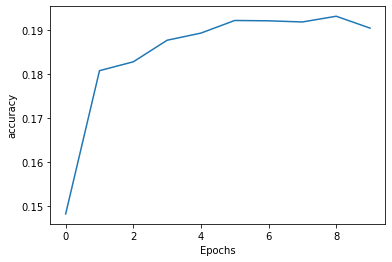

In [19]:
plot_graphs(history, 'accuracy')


In [17]:
seed_text = "We will drain the swamp in Washington D.C."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

AttributeError: ignored